In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data_frame=pd.read_csv("googleplaystore.csv")

In [66]:
data_frame.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
data_frame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [68]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### -goruldugu uzere totalde 10841 row var. birkacinda nan degerler var bazilarinda yok.<br> -data type bakacak olursak sadece 'raiting' float degere sahip geri kalanlar object. ama data frame'de 'reviews', 'size', 'install, 'price' gibi gibi degerlerin cogu float int'e benzemesine ragmen obj

In [69]:
data_frame.describe() #yapildiginda sadece 'raiting' icin gelecek

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Missing Data

In [70]:
data_frame.isnull().sum() #burda gorulcegi uzere bazilarinda az bazilarinda hic NaN degeri var. 'Raiting' de bayagi var ama

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 'Reviews' i int cevirmeye calisalim

In [71]:
data_frame['Reviews'].unique() #string ama int'e cevirilebilir

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [72]:
print(data_frame["Reviews"].str.isnumeric()) #bu string'de olsa int'e cevirebildiklerime bakabilirim
print("\n",data_frame["Reviews"].str.isnumeric().sum()) #dersek kac tanesi olabiliyor onu goruruz

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Reviews, Length: 10841, dtype: bool

 10840


##### goruldugu uzere 10841 datadan 10840'i cevirilebilirmis. yani arada 1 tanesi cevirilemezmis

In [73]:
print(data_frame[data_frame["Reviews"].str.isnumeric()], "\n\n") #bize hangileri int olabiliyor onu gosterir

print(data_frame[~data_frame["Reviews"].str.isnumeric()])# '~' isreti sayesinde bize olmayan yani cevirilemeyen degeri getirir!!

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

##### baktigimiz uzere ~ isreti sayesinde cevirilemeyen row'u bulduk. 10472. index'de reviews=3.0m yani int'e cevirilemez. bunu silebiliriz

In [74]:
data_frame_clean=data_frame.copy()

In [75]:
data_frame_clean=data_frame_clean.drop(data_frame_clean.index[10472])

In [76]:
data_frame_clean.info() #10841'den -->10840 a dusecek total row sayisi

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [77]:
data_frame_clean["Reviews"].str.isnumeric().sum() #goruldugu uzere 10840 tanesi cevirilebilir

np.int64(10840)

In [78]:
data_frame_clean["Reviews"]=data_frame_clean["Reviews"].astype(int) #diyerek artik int'e cevirebiliriz degerleri

In [79]:
data_frame_clean.info() #diyerek 'Reviews'in int e dondugunu gorecegiz

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [80]:
data_frame_clean.describe() #bak artik bu da geldi

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


### 'size' yi float yapmaya calisalim

In [81]:
data_frame_clean["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
992k                     1
658k                     1
73k                      1
246k                     1
Name: count, Length: 461, dtype: int64

In [82]:
data_frame_clean["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

##### dsad

##### iste mb'lar kb'lar filan var ama sey de var.'Varies with device'. simdi adim adim duzenleyelim bu column'u.<br> <br>-ilk olarak hepsini kb cinsinden yazalim k yerine hicbisey yazcaz, m yerine 000 koycaz

In [83]:
data_frame_clean["Size"]=data_frame_clean["Size"].str.replace("M", "000") #M-->000 degistiriyoz
data_frame_clean["Size"]=data_frame_clean["Size"].str.replace("k", "") #k-->"" ile degistiriyoz

In [84]:
data_frame_clean["Size"].unique() #gorulecegi uzere gitmisler

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

 ##### simdi ise  'Varies with device' olayina el atalim. onu 'Nan' ile degistirecegiz <br> fakat burda .str kullanmicaz ve kendisini direk vercez

In [85]:
data_frame_clean["Size"]=data_frame_clean["Size"].replace("Varies with device", np.nan) #nan ile degistiririz

In [86]:
data_frame_clean["Size"].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [87]:
data_frame_clean["Size"]=data_frame_clean["Size"].astype(float) #floata'a ceviririz

In [88]:
data_frame_clean.info() #Size kisminin datatype kismini float gorebiliriz

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


### 'install' ve 'price' int'e cevirme

In [89]:
print(data_frame_clean["Installs"].value_counts(), "\n")
print(data_frame_clean["Installs"].unique())

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64 

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [90]:
print(data_frame_clean["Price"].value_counts(),"\n")
print(data_frame_clean["Price"].unique())

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64 

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1

##### ikisini de incelersek 'Installs'dan hem + hem de , isaretlerini; 'Price'den $ isretini sileccegiz.<br> <br> pratik olmasi acisindan silecegimiz isretleri ve hangi columnda uygulayacagimizi belirtip for loopuna sokabiliriz

In [91]:
silinecek_isaretler=["+",",","$"]
columnlar=["Installs","Price"]

for item in silinecek_isaretler:
    for col in columnlar:
        data_frame_clean[col]=data_frame_clean[col].str.replace(item, "")

# bu islem bize inanilmaz kolaylik saglicaktir. mesela cok column varsa degil mi!

In [92]:
print(data_frame_clean["Installs"].unique(),"\n\n",data_frame_clean["Price"].unique()) #goruldugu uzere degismis

['10000' '500000' '5000000' '50000000' '100000' '50000' '1000000'
 '10000000' '5000' '100000000' '1000000000' '1000' '500000000' '50' '100'
 '500' '10' '1' '5' '0'] 

 ['0' '4.99' '3.99' '6.99' '1.49' '2.99' '7.99' '5.99' '3.49' '1.99' '9.99'
 '7.49' '0.99' '9.00' '5.49' '10.00' '24.99' '11.99' '79.99' '16.99'
 '14.99' '1.00' '29.99' '12.99' '2.49' '10.99' '1.50' '19.99' '15.99'
 '33.99' '74.99' '39.99' '3.95' '4.49' '1.70' '8.99' '2.00' '3.88' '25.99'
 '399.99' '17.99' '400.00' '3.02' '1.76' '4.84' '4.77' '1.61' '2.50'
 '1.59' '6.49' '1.29' '5.00' '13.99' '299.99' '379.99' '37.99' '18.99'
 '389.99' '19.90' '8.49' '1.75' '14.00' '4.85' '46.99' '109.99' '154.99'
 '3.08' '2.59' '4.80' '1.96' '19.40' '3.90' '4.59' '15.46' '3.04' '4.29'
 '2.60' '3.28' '4.60' '28.99' '2.95' '2.90' '1.97' '200.00' '89.99' '2.56'
 '30.99' '3.61' '394.99' '1.26' '1.20' '1.04']


#### simdi artik type'lerini degistirebiliriz

In [93]:
data_frame_clean["Price"]=data_frame_clean["Price"].astype(float)

In [94]:
data_frame_clean["Installs"]=data_frame_clean["Installs"].astype(int)

In [95]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


## Tarihlere El Atmak

In [96]:
data_frame_clean["Last Updated"].unique() #burda cok deger cikacaktir  string girilmis

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

##### pandas'da 'to_datetime' fonksiyonu vardir. aldigi stringi __datatime__ objesine donusturur.<br> iste icerisinde dayfirst, yearfirst gibi parametreler var eger yil once ise iste yearfirst parametresini filan kullanacan. default=false dir durum oyle ise true yap <br> en iyi yolunu kullanacagiz

In [97]:
data_frame_clean["Last Updated"] = pd.to_datetime(data_frame_clean["Last Updated"]) #deriz ve datetime objesine donusur ve kendisi halleder

In [98]:
data_frame_clean.head() #gorulcegi uzere kendisi halletmis

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### tabi bu degerleri gun, ay, yil olarak ayri ayri column'lara da ayirabiliriz <br> Fakat bu islemi yapabilmek icin oncelikle o column'u datetime obesine cevirmis oldugumuzdan emin olmaliyiz

In [99]:
data_frame_clean.info() #"Last Update"nin datetime objesi oldugunu goruyoruz

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [100]:
data_frame_clean["Day"]=data_frame_clean["Last Updated"].dt.day
data_frame_clean["Month"]=data_frame_clean["Last Updated"].dt.month
data_frame_clean["Year"]=data_frame_clean["Last Updated"].dt.year

In [101]:
data_frame_clean.head() #gordugumuz gibi olmus bu islemde

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


## EDA

### Dagilim Grafikleri

In [102]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

#### tabi biz seye bakmadik-->App icin acaba dı-uplicated data var mi? ayni isimden birden fazla girilmis mi bakmadik.

In [103]:
data_frame_clean[data_frame_clean.duplicated("App")] #dersek bize duplice eden datalari getirecek-->1181 taneymis

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


#### drop_duplicated kullanarak duplicate eden datalari silebiliriz. 

In [104]:
data_frame_clean=data_frame_clean.drop_duplicates(subset=["App"], keep="first") #keep-->first ilk gordugunu tut demek. bunu degistirebilin istersen

In [105]:
data_frame_clean.info() #dersek goruldugu uzere 9659 dataya dusmus oldu

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

#### simdi bakarsak bazi datalarin type'leri int bazilari float filan ama bazilari object. <br>simdi biz eger App, Category gibi columnlarin datatype'ne bakarsak bize -->___'O'__ ciktisini vereccektir

In [106]:
data_frame_clean["App"].dtype #goruldugu gibi bunlar 'O' verir

dtype('O')

#### biz iste simdi numeric degerleri ve olmayan degerleri ayirip grafigini cizdirebiliriz.<br><br> soyle kullanabiliriz-->numeric_degerler=["Raiting","Reviews",..] seklinde de yazabilirz ama bir alternatif daha var

In [107]:
numeric_degerler=[feature for feature in data_frame_clean.columns if data_frame_clean[feature].dtype != 'O' ]
categoric_degerler=[feature for feature in data_frame_clean.columns if data_frame_clean[feature].dtype == 'O' ] 

#datatype'i != 'O' diyerek geriye kalan int float gibi degerleri aliyoruz

In [108]:
print(numeric_degerler,"\n",categoric_degerler) #gordugumuz gibi tam da istedigimiz sekilde ayirmis

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year'] 
 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


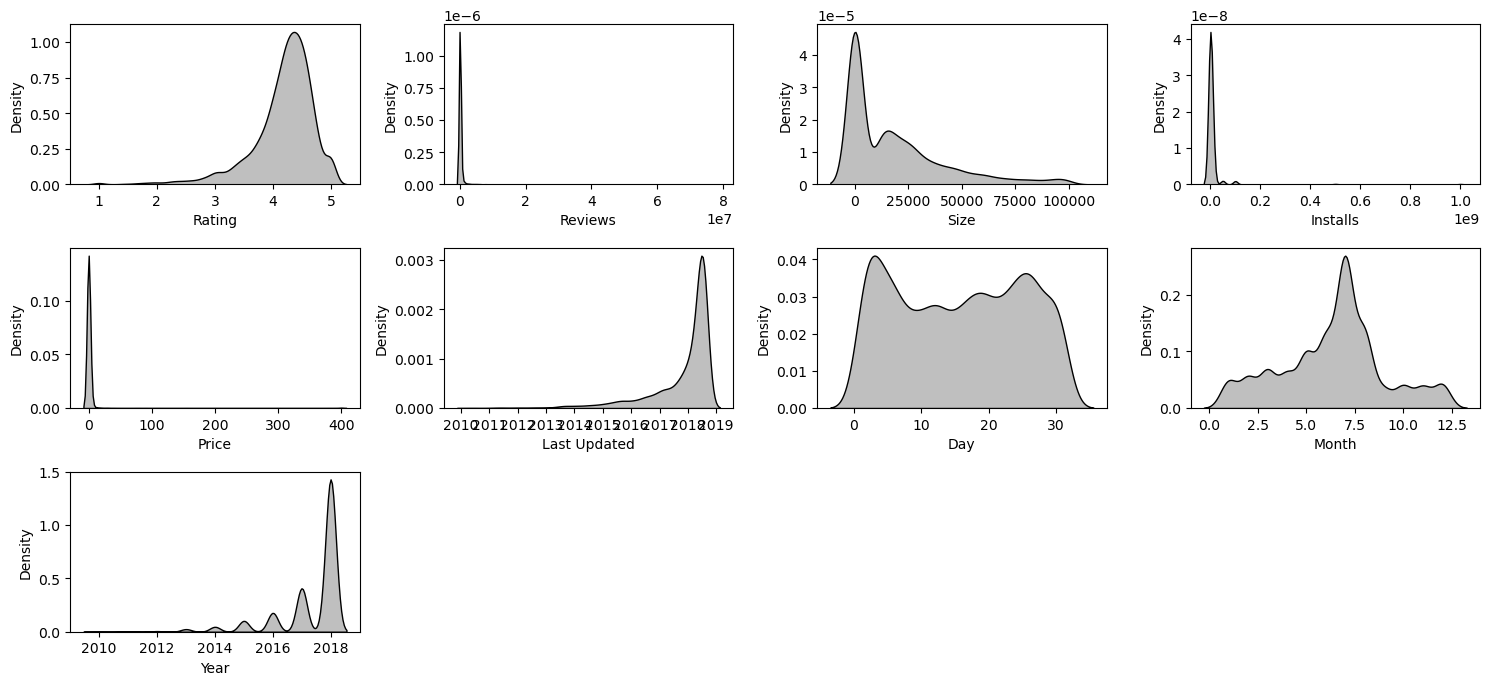

In [109]:
plt.figure(figsize=(15,11))

for i in range(0, len(numeric_degerler)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=data_frame_clean[numeric_degerler[i]],  color="black", fill=True)
    plt.xlabel(numeric_degerler[i])
    plt.tight_layout()

plt.show()

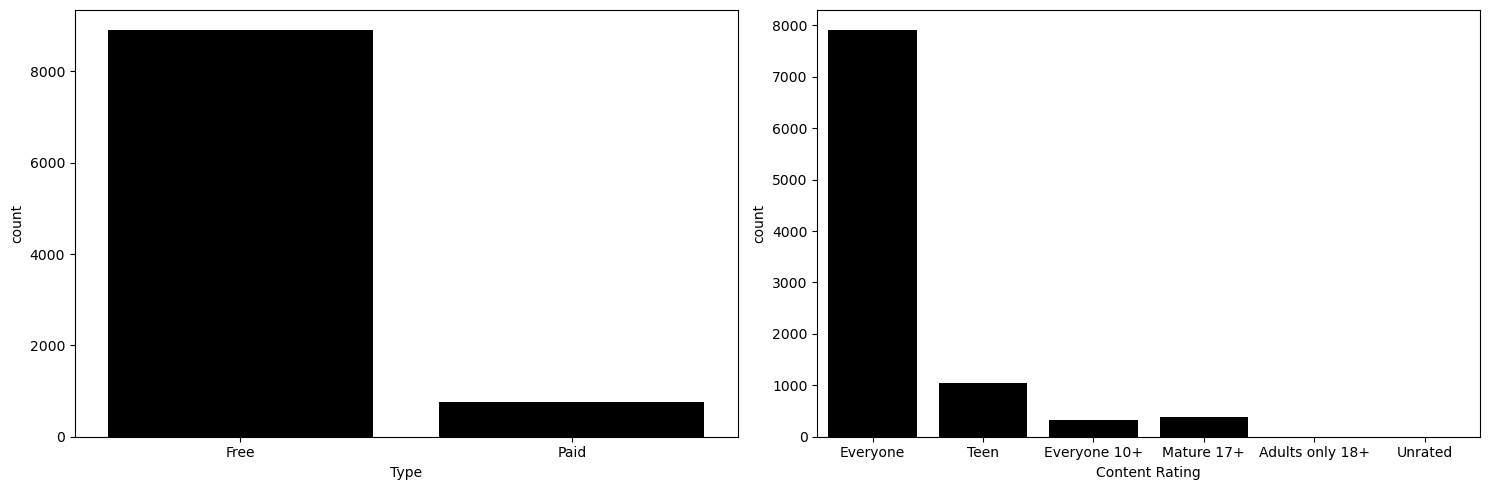

In [110]:
plt.figure(figsize=(15,5))

secilenler = ["Type","Content Rating"]

for i in range(0, len(secilenler)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=data_frame_clean[secilenler[i]],  color="black", fill=True)
    plt.xlabel(secilenler[i])
    plt.tight_layout()

plt.show()

In [111]:
data_frame_clean["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

### top app categories by installment

In [112]:
data_frame_clean.groupby("Category")["Installs"].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

##### boyle bakildigi zaman tabi sayilar cok buyuk. Karsilastirma yapmaya pek musait degil

In [113]:
data_frame_clean.groupby("Category")["Installs"].sum().sort_values(ascending=False)/1000000

Category
GAME                   13878.924415
COMMUNICATION          11038.276251
TOOLS                   8001.771915
PRODUCTIVITY            5793.091369
SOCIAL                  5487.867902
PHOTOGRAPHY             4649.147655
FAMILY                  4427.941505
VIDEO_PLAYERS           3926.902720
TRAVEL_AND_LOCAL        2894.887146
NEWS_AND_MAGAZINES      2369.217760
ENTERTAINMENT           2113.660000
BOOKS_AND_REFERENCE     1665.969576
PERSONALIZATION         1532.494782
SHOPPING                1400.348785
HEALTH_AND_FITNESS      1144.022512
SPORTS                  1096.474498
BUSINESS                 697.164865
LIFESTYLE                503.823539
MAPS_AND_NAVIGATION      503.281890
FINANCE                  455.348734
WEATHER                  361.100520
EDUCATION                352.952000
FOOD_AND_DRINK           211.798751
DATING                   140.926107
ART_AND_DESIGN           114.338100
HOUSE_AND_HOME            97.212461
AUTO_AND_VEHICLES         53.130211
LIBRARIES_AND_DEMO 

##### boylelikle karsilastirma yapabilmek icin kucultmus olduk

### ilk 10 degeri install'e gore diz

In [114]:
df2=(data_frame_clean.groupby("Category")["Installs"].sum().sort_values(ascending=False)/1000000).head(10).reset_index()

In [115]:
df2

,Category,Installs
0,GAME,13878.924415
1,COMMUNICATION,11038.276251
2,TOOLS,8001.771915
3,PRODUCTIVITY,5793.091369
4,SOCIAL,5487.867902
5,PHOTOGRAPHY,4649.147655
6,FAMILY,4427.941505
7,VIDEO_PLAYERS,3926.902720
8,TRAVEL_AND_LOCAL,2894.887146
9,NEWS_AND_MAGAZINES,2369.217760


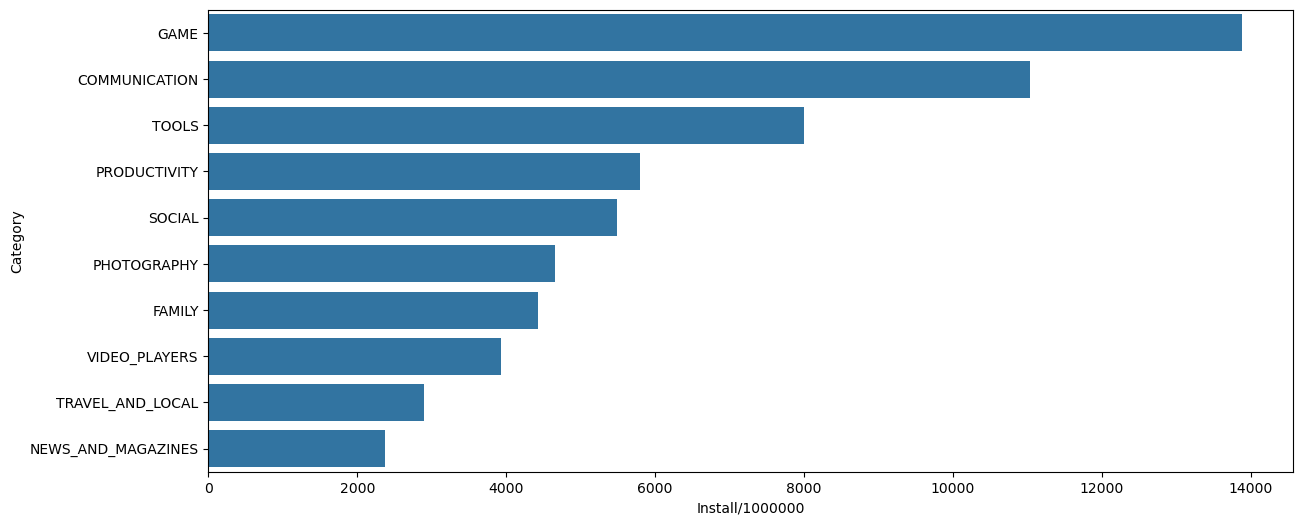

In [116]:
plt.figure(figsize=(14,6))
sns.barplot(x="Installs", y="Category", data=df2)
plt.xlabel("Install/1000000")
plt.show()

### ilk 5 uygulama in this categories

In [117]:
data_frame_clean.groupby(["Category","App"])["Installs"].sum()

Category        App                                                                              
ART_AND_DESIGN  350 Diy Room Decor Ideas                                                                10000
                3D Color Pixel by Number - Sandbox Art Coloring                                        100000
                AJ Styles HD Wallpapers                                                                  5000
                AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper                                        1000
                Ai illustrator viewer                                                                  100000
                                                                                                       ...   
WEATHER         Yahoo Weather                                                                        10000000
                Yahoo! Weather for SH Forecast for understanding the approach of rain clouds Free     1000000
                Yandex

##### goruldugu uzere hem category hem de app'e gore install verdi ve cok fazla data oldu 

In [118]:
df_uyg_category=data_frame_clean.groupby(["Category","App"])["Installs"].sum().reset_index()#direyek bunu bi df'e atayalim

In [119]:
df_uyg_category=df_uyg_category.sort_values("Installs", ascending=False)

In [120]:
df_uyg_category

,Category,App,Installs
9342,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1534,ENTERTAINMENT,Google Play Games,1000000000
9496,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
547,BUSINESS,CX Network,0
3661,FINANCE,Eu Sou Rico,0
2211,FAMILY,Command & Conquer: Rivals,0
3662,FINANCE,Eu sou Rico,0


#### biz ilk 5 category'e giren categorilere ait ilk 5 app'i istiyoruz.

In [121]:
apps=["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]

for i, app in enumerate(apps):
    df3=df_uyg_category[df_uyg_category.Category==app]

#bu ilk basta "GAME" sonra "COMMUNICATION" diye diye en son "SOCIAL" icin olusturur ve sadece SOCIAL'DEN olanlari alir.
#yani "GAME" icin yapiyor siliyor sonra "COMMUNICATION" icin yapiyor siliyor bu sekilde gidiyor

In [122]:
print(df3,"\n\n",df3.head(5))

     Category                       App    Installs
7883   SOCIAL                  Facebook  1000000000
7908   SOCIAL                   Google+  1000000000
7919   SOCIAL                 Instagram  1000000000
7885   SOCIAL             Facebook Lite   500000000
7984   SOCIAL                  Snapchat   500000000
...       ...                       ...         ...
7838   SOCIAL  C.P. CERVANTES (TOBARRA)           5
7823   SOCIAL                BH Connect           1
7813   SOCIAL                 Amleen Ey           1
7808   SOCIAL   Ak Parti Yardım Toplama           0
7963   SOCIAL             Pekalongan CJ           0

[239 rows x 3 columns] 

      Category            App    Installs
7883   SOCIAL       Facebook  1000000000
7908   SOCIAL        Google+  1000000000
7919   SOCIAL      Instagram  1000000000
7885   SOCIAL  Facebook Lite   500000000
7984   SOCIAL       Snapchat   500000000


In [123]:
apps=["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]

for i, app in enumerate(apps):
    df4=df_uyg_category[df_uyg_category.Category==app]
    df4=df4.head(5)
    print(df4)

     Category               App    Installs
4773     GAME    Subway Surfers  1000000000
4802     GAME      Temple Run 2   500000000
4167     GAME  Candy Crush Saga   500000000
4580     GAME    My Talking Tom   500000000
4628     GAME               Pou   500000000
           Category                                       App    Installs
1145  COMMUNICATION             Skype - free IM & video calls  1000000000
1181  COMMUNICATION                        WhatsApp Messenger  1000000000
1099  COMMUNICATION  Messenger – Text and Video Chat for Free  1000000000
1058  COMMUNICATION              Google Chrome: Fast & Secure  1000000000
1055  COMMUNICATION                                     Gmail  1000000000
     Category                                                App    Installs
8837    TOOLS                                             Google  1000000000
8613    TOOLS            Clean Master- Space Cleaner & Antivirus   500000000
8842    TOOLS                                   Google Transl

#### aslinda istenilen bu. her kategoriden ilk ilk 5 uygulamayi goster seklinde olcaksa bu

### simdi ise grafikte gosterelim

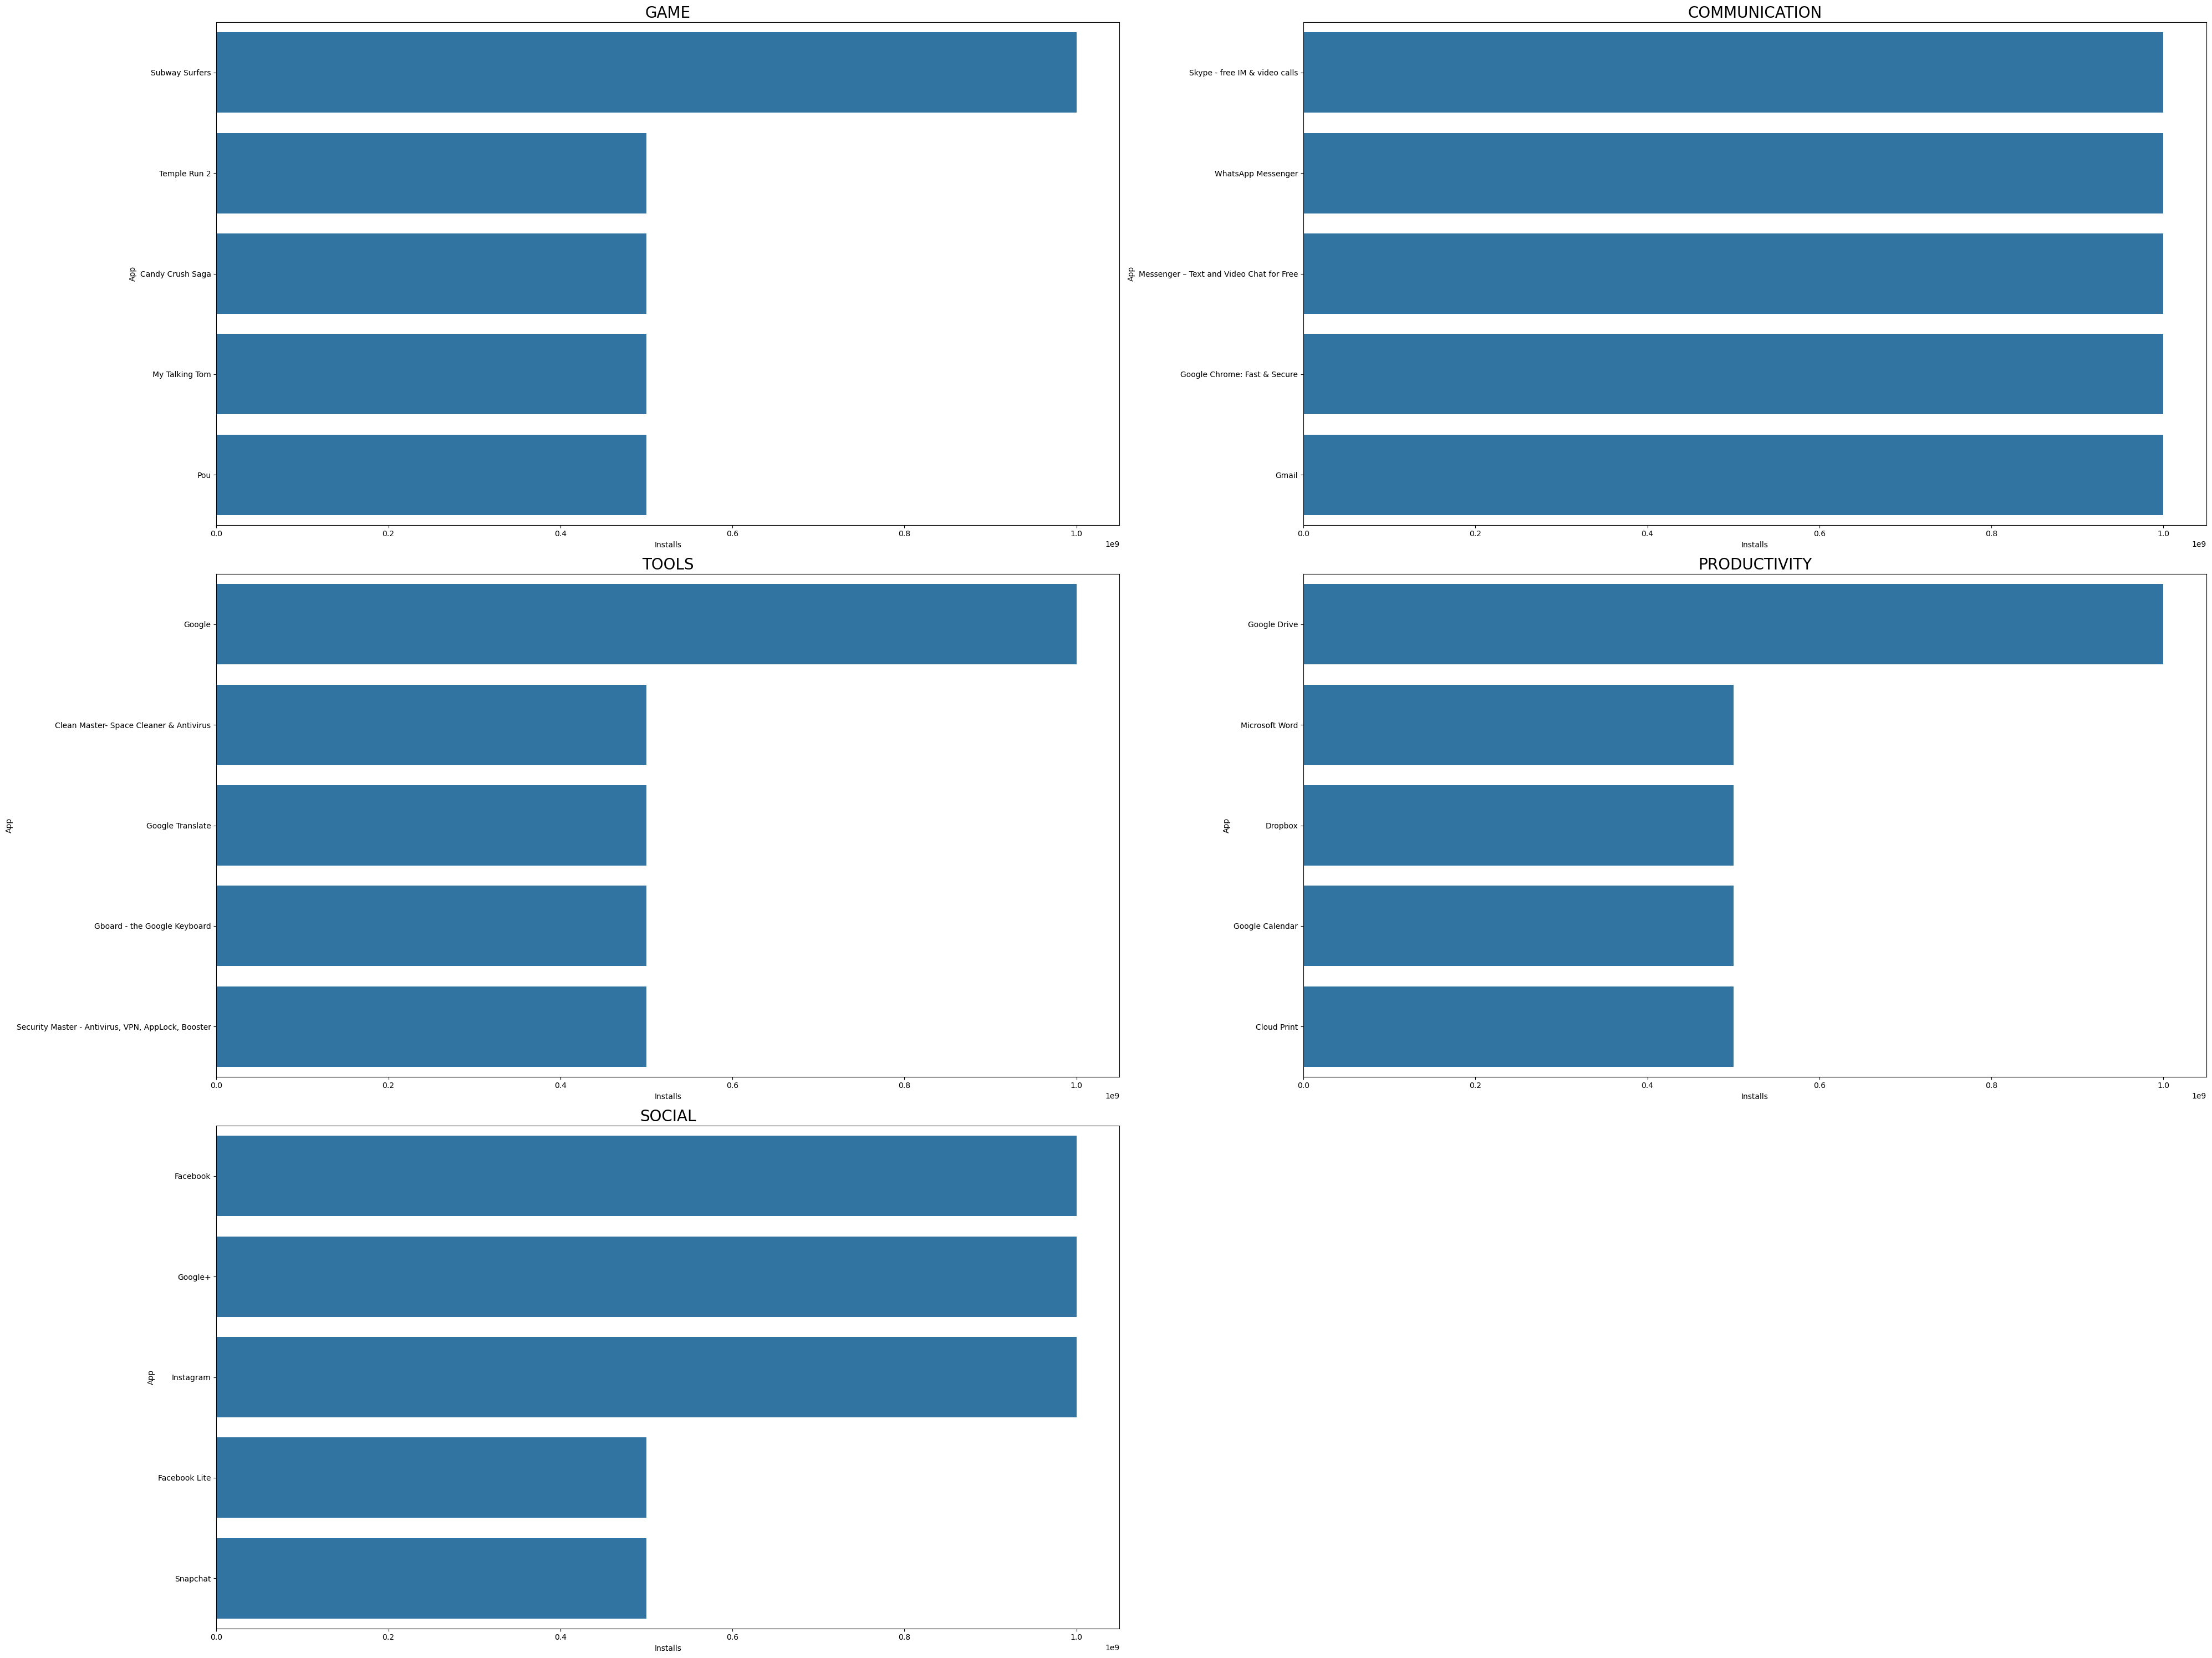

In [124]:
plt.figure(figsize=(40,30))
apps=["GAME","COMMUNICATION","TOOLS","PRODUCTIVITY","SOCIAL"]

for i, app in enumerate(apps):
    df5=df_uyg_category[df_uyg_category.Category==app]
    df5=df5.head(5)

    plt.subplot(3,2,i+1)
    sns.barplot(x="Installs",y="App", data=df5)
    plt.title(app, size=20)
plt.tight_layout()
plt.show()


### 5.0 raiting'li apps

In [125]:
data_frame_clean.groupby(["Category","Installs","App"])["Rating"].sum().sort_values(ascending=False)
#diyerek baya baya analiz edilebilir

Category             Installs  App              
FAMILY               10        DN Employee          5.0
                               Chronolink DX        5.0
MEDICAL              500       FHR 5-Tier 2.0       5.0
HEALTH_AND_FITNESS   10        CB Fit               5.0
MEDICAL              100       Zen Leaf             5.0
                                                   ... 
NEWS_AND_MAGAZINES   5         INTERKINOIS.CD       0.0
                     0         Sweden Newspapers    0.0
MAPS_AND_NAVIGATION  10        AJ Reminders         0.0
EVENTS               10        EVENTOS DF           0.0
NEWS_AND_MAGAZINES   100       DW Espanol           0.0
Name: Rating, Length: 9659, dtype: float64

In [126]:
rating_df=data_frame_clean.groupby(["Category","Installs","App"])["Rating"].sum().sort_values(ascending=False).reset_index()

In [127]:
en_iyi_uyg=rating_df[rating_df["Rating"]==5.0]# diyerek 5.0 rating'li app leri alabiliriz

In [128]:
en_iyi_uyg

,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0
1,FAMILY,10,Chronolink DX,5.0
2,MEDICAL,500,FHR 5-Tier 2.0,5.0
3,HEALTH_AND_FITNESS,10,CB Fit,5.0
4,MEDICAL,100,Zen Leaf,5.0
...,...,...,...,...
266,FAMILY,10,Story Time FD,5.0
267,FAMILY,50,DYPSOET,5.0
268,LIBRARIES_AND_DEMO,1000,Nur təfsiri 1-ci cild,5.0
269,LIBRARIES_AND_DEMO,1000,Eternal life,5.0


### version cleanup

In [129]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

##### android ver columnunu ele alalim

In [130]:
data_frame_clean["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

#### goruldugu uzere a-'and up', 'Varies with device', 'W' gibi degerler var bunlar tabi ki rahatsiz edici bunlardan kurtulmak gerek

In [131]:
data_frame_clean["Android Ver"]=data_frame_clean["Android Ver"].replace("and up", "", regex=True)

#### Bu bir pattern eşleşmesi yöntemidir. Çok pratik ve kullanışlıdır. Örnek olarak, bir metin içindeki tüm e-posta adreslerini bulmak, bir dizideki tüm telefon numaralarını çıkarmak veya bir cümlenin belirli bir kelimeyle başlayıp başlamadığını kontrol etmek için kullanılır.<br> "and up" kelimesi ve bu kelimeye benzeyen kelimeleri bulup onları kaldırıyor. 

In [132]:
data_frame_clean["Android Ver"]=data_frame_clean["Android Ver"].replace("Varies with device", np.nan, regex=True).replace("W","",regex=True)

In [133]:
data_frame_clean["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [134]:
data_frame_clean["Android Ver"].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               829
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
5.0 - 8.0           2
4.0.3 - 7.1.1       2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

#### simdi de "2.2-7.1.1" gibi arada '-' isareti olanlar var bunlar da rahatsiz edebilir. bunlara bakacak olursak sayisi zaten az o yuzden silebiliriz

In [135]:
data_frame_clean[data_frame_clean["Android Ver"].str.contains('-')==True] #bu bize icinde "-" olanı getir demek

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


#### goruldugu gibi cok az o yuzden bunlari silebiliriz

In [136]:
data_frame_clean=data_frame_clean[data_frame_clean["Android Ver"].str.contains('-')==False]

In [137]:
data_frame_clean["Android Ver"].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

#### goruldugu gibi gitmisler

## Target Encoding Pratigi

In [138]:
data_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 0 to 10838
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8658 non-null   object        
 1   Category        8658 non-null   object        
 2   Rating          7240 non-null   float64       
 3   Reviews         8658 non-null   int64         
 4   Size            8375 non-null   float64       
 5   Installs        8658 non-null   int64         
 6   Type            8658 non-null   object        
 7   Price           8658 non-null   float64       
 8   Content Rating  8658 non-null   object        
 9   Genres          8658 non-null   object        
 10  Last Updated    8658 non-null   datetime64[ns]
 11  Current Ver     8650 non-null   object        
 12  Android Ver     8658 non-null   object        
 13  Day             8658 non-null   int32         
 14  Month           8658 non-null   int32         
 15  Year    

In [139]:
data_frame_clean["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Simulation',
       'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adven

### goruldugu uzere cok cok fazla. <br>"Genres" yerine genres!teki "installs"larin ortalamasini koyalim. Bu target encoding olur<br> mesela a'nın install ort=20, b'nin=30. yeni bir column acip her a gelen row'a 20, b gelen row'a 30 yazacagiz

In [140]:
ort_genres_isntalls = data_frame_clean.groupby(["Genres"])["Installs"].mean()/1000000

In [141]:
 ort_genres_isntalls #karsilastirma yapmak icin cok iyi bir secenek olduu

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64

#### __data_frame_clean["Genres Enncoded"]=ort_genres_isntalls__ , deyip  data_frame_clean["Genres Enncoded"] cagirirsam hepsine Nan degeri donecektir.<br> bizim yapmak istedigimzde 9000 filan column  var ama bunda az yani o yuzden olmicaktir.

#### onu anlatmak icin dictionary'e cevirebiliriz ort_genres_installs'i

In [142]:
ort_genres_isntalls=ort_genres_isntalls.to_dict() #seklinde  cevirebiliriz

In [143]:
ort_genres_isntalls

{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.540684218390805,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5753873205128205,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0347099612403101,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.909181

In [144]:
data_frame_clean["Genres Encoded"]=data_frame_clean["Genres"].map(ort_genres_isntalls)

In [145]:
data_frame_clean["Genres Encoded"]

0        1.830859
1        0.500000
2        1.830859
3        1.830859
4        0.285000
           ...   
10834    0.360664
10835    1.034710
10836    0.360664
10837    0.360664
10838    0.092978
Name: Genres Encoded, Length: 8658, dtype: float64